# Customer Segmentation with RFM and K-Mean Clustering

## Overview
 This project segments or groups customers based on Recency, Frequency and Monetary (RFM) behaviour and further segments using K-Mean clustering. This will enables the company to know how various customers interacts with their brand and also optimize their business strategy.
>*This analysis only considered delivered orders*

 ## Dataset
 Data source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
 
 Description: This is a real commercial Dataset of orders from a Brazilian E-commerce (Olist), though it has been anonymized. It consists of 100k orders spanned from 2016 - 2018
 
 File name: Olist
 
 ## Objectives
 - Group customers based on shared characterististics
 - segement customers in RFM (Recency, Frequency and Monetary)
 - Segment using K-Mean Clustering Algorithm
 - Identify different segments of customers
 - Recommend improvement strategies




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from sklearn import preprocessing
import datetime as dt




## Data Cleaning

In [3]:
customer_df = pd.read_csv('olist_customers_dataset.csv')
order_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
customer_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


# Merging the required dataFrames

In [4]:
data_df = pd.merge(customer_df, order_df,  on='customer_id')
data_df = pd.merge(data_df, order_items_df, on='order_id')
data_df1 = pd.merge(data_df, payment_df, on='order_id')

data_df1.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25


# Checking for Null(s) and dataset structure

In [5]:
print(f"\nNulls: \n", data_df1.isnull().sum())

data_df1.describe()


Nulls: 
 customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64


,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,35051.793097,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752
std,29820.588877,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000
50%,24315.000000,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000
75%,58600.000000,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000


The columns with blanks will not impact our analysis but the minimum payment value is 0. Hence, we move forward to filtering our dataset

## Filtering

In [6]:
#Lets confirm how many different order status
data_df1['order_status'].unique()


array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [7]:
# Lets filter out the delivered only for a better analysis and also where payment value is greater than 0

data_df1.query("order_status == 'delivered' and payment_value > 0", inplace=True)

# Confirming order status 
print(f'\nOrder status: \n', data_df1['order_status'].unique())

c_data_df = data_df1[['customer_unique_id', 'order_id', 'customer_zip_code_prefix', 'customer_state', 'order_purchase_timestamp', 'payment_value'  ]]



Order status: 
 ['delivered']


In [8]:
c_data_df = c_data_df.rename(columns = {'customer_zip_code_prefix': 'zip_code', 'order_purchase_timestamp':'order_date', 'payment_value' : 'Amount'})

#converting order date to datetime for time inteligence

c_data_df['order_date']= pd.to_datetime(c_data_df['order_date'], errors='coerce')

print(f'data type:\n',c_data_df['order_date'].dtypes)


print(f'\ndata structure:\n',c_data_df.describe())

print(f'\nNull:\n', c_data_df.isnull().sum())

print(f'\nDuplicate value:\n', c_data_df.duplicated().values)

data type:
 datetime64[ns]

data structure:
             zip_code                     order_date         Amount
count  115031.000000                         115031  115031.000000
mean    35081.048969  2017-12-31 19:58:07.920500224     171.920269
min      1003.000000            2016-10-03 09:44:50       0.010000
25%     11310.000000            2017-09-13 08:00:50      60.850000
50%     24320.000000            2018-01-19 12:33:36     108.190000
75%     58801.500000            2018-05-04 16:54:30     188.940000
max     99980.000000            2018-08-29 15:00:37   13664.080000
std     29851.715308                            NaN     266.111518

Null:
 customer_unique_id    0
order_id              0
zip_code              0
customer_state        0
order_date            0
Amount                0
dtype: int64

Duplicate value:
 [False False False ... False False False]


In [9]:
#Declaring the most recent day of Sales
lastest_day = c_data_df['order_date'].max() + pd.Timedelta(days=1)
c_data_df.dtypes

customer_unique_id            object
order_id                      object
zip_code                       int64
customer_state                object
order_date            datetime64[ns]
Amount                       float64
dtype: object

## To see our data distribution

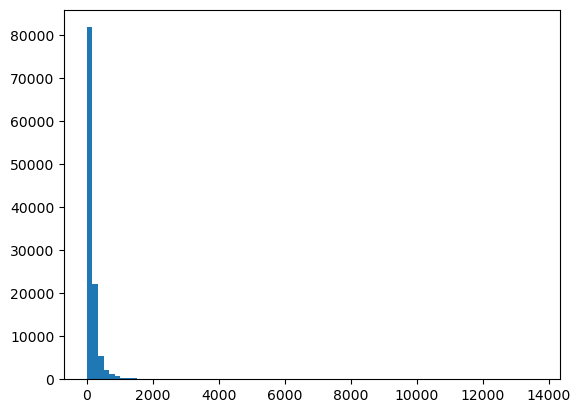

In [10]:
plt.hist(c_data_df['Amount'], bins=80)
plt.show()

## Calculating RFM values

In [11]:
#Calculating RFM 

RFM = c_data_df.groupby('customer_unique_id').agg(
    Recency = ('order_date', lambda x: (lastest_day - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary = ('Amount', 'sum'),
    Duration = ('order_date', lambda x: (x.max() - x.min()).days ) 
    
    )

#Rounding to whole numbers
RFM['Duration'] = RFM['Duration'].round(0)

#Calculating Average customer life span
RFM['Average_dur'] = RFM['Duration']/RFM['Frequency']

RFM['Average_dur'] = RFM['Average_dur'].round(0)

RFM['Recency'].describe()


count    93357.000000
mean       237.936673
std        152.584315
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
max        695.000000
Name: Recency, dtype: float64

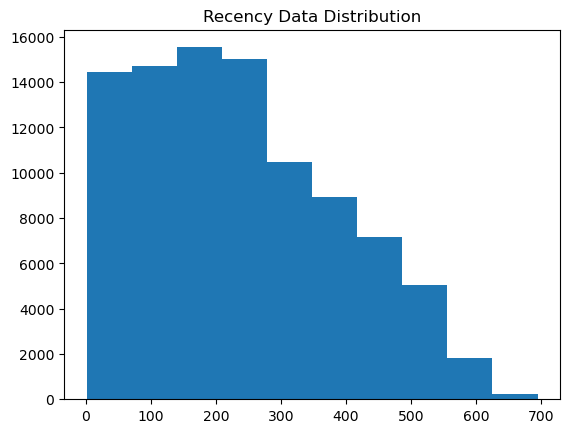

In [12]:
plt.hist(RFM['Recency']) 
plt.title('Recency Data Distribution')
plt.show()


Frequency:
 count    93357.000000
mean         1.033420
std          0.209099
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: Frequency, dtype: float64


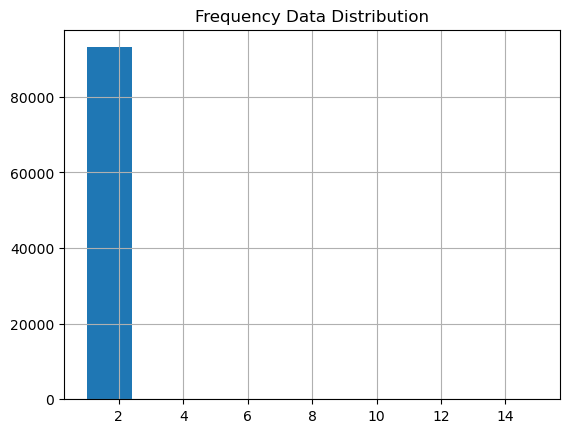

In [13]:
print(f'\nFrequency:\n', RFM['Frequency'].describe())
RFM['Frequency'].hist()
plt.title('Frequency Data Distribution')
plt.show()

\Monetary:
 count     93357.000000
mean        211.833718
std         642.166523
min           9.590000
25%          63.760000
50%         112.950000
75%         201.740000
max      109312.640000
Name: Monetary, dtype: float64


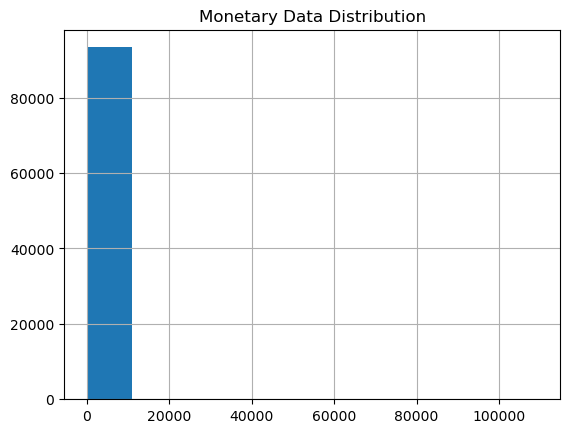

In [14]:
print(f'\Monetary:\n',RFM['Monetary'].describe())
RFM['Monetary'].hist()
plt.title('Monetary Data Distribution')
plt.show()

## Calculating and assigning RFM score

In [15]:
#defining our quantiles for each
quantiles = RFM.quantile(q=[0.25, 0.50, 0.75]).to_dict()


We chose our score of 1 to 4, where 4 is the best score and 1 is the minimum

### For Recency:
the lower the recency number, the better 
therefore, will assign 4 to the least quantile and vice versa

while for:

### Frequency and Monetary:

the higher the number the better they are. Hence, we will assign 4 to the highest quantile and 1 for the minimum 

In [16]:
#higher quantiles for lower recency 

def RScore(s, c, d):
    if s <= d[c][0.25]:
        return 4
    
    elif s <= d[c][0.50]:
        return 3
    
    elif s <= d[c][0.75]:
        return 2
    
    else:
        return 1

#Higher qunatiles for higher scores

def FMScore(s, c, d):
    if s <= d[c][0.25]:
        return 1
        
    elif s <= d[c][0.50]:
        return 2
        
    elif s <= d[c][0.75]:
        return 3
        
    else:
        return 4
    
#assigning scores

RFM['R']= RFM['Recency'].apply(RScore, args=('Recency', quantiles))

RFM['F'] = RFM['Frequency'].apply(FMScore, args=('Frequency', quantiles))

RFM['M'] = RFM['Monetary'].apply(FMScore, args=('Monetary', quantiles))


RFM['RFM_score'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)

RFM['agg'] = RFM[['R', 'F', 'M']].sum(axis=1)


#pd.set_option('display.max_rows', None)

RFM

,Recency,Frequency,Monetary,Duration,Average_dur,R,F,M,RFM_score,agg
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0,0.0,4,1,3,413,8
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,0,0.0,3,1,1,311,5
0000f46a3911fa3c0805444483337064,537,1,86.22,0,0.0,1,1,2,112,4
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,0,0.0,2,1,1,211,4
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,0,0.0,2,1,3,213,6
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,0,0.0,1,1,4,114,6
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,0,0.0,2,1,2,212,5
ffff371b4d645b6ecea244b27531430a,568,1,112.46,0,0.0,1,1,2,112,4


In [17]:
def cus_segment(row):
     r,f,m = row['R'], row['F'], row['M']
     
     if (r==4) and (f>=3) and (m>=3):
         return 'Champion'
     
     if (r>=3) and (f>=3):
         return 'Loyal customer'
     
     if (r>=3) and (f==2):
         return 'potential Loyal'
     
     if (r==4) and (f<=2):
         return 'New customer'
     
     if (r==3) and (f<=2):
         return 'Promising customer'
     
     if (r==2) and (f==2):
         return 'Needs attention'
     
     if (r==2) and (f>=3):
         return 'At risk'
     
     if (r==2) and (f==4) and (m>=3):
         return 'Must revive'
     
     if (r==2) and (f==1):
         return 'About to sleep'
     
     if   (r==1) and (f==1):
         return 'Churned'
     
 
RFM['segment'] = RFM.apply(cus_segment, axis=1)

RFM

,Recency,Frequency,Monetary,Duration,Average_dur,R,F,M,RFM_score,agg,segment
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,0,0.0,4,1,3,413,8,New customer
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,0,0.0,3,1,1,311,5,Promising customer
0000f46a3911fa3c0805444483337064,537,1,86.22,0,0.0,1,1,2,112,4,Churned
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,0,0.0,2,1,1,211,4,About to sleep
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,0,0.0,2,1,3,213,6,About to sleep
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,447,1,4134.84,0,0.0,1,1,4,114,6,Churned
fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,0,0.0,2,1,2,212,5,About to sleep
ffff371b4d645b6ecea244b27531430a,568,1,112.46,0,0.0,1,1,2,112,4,Churned


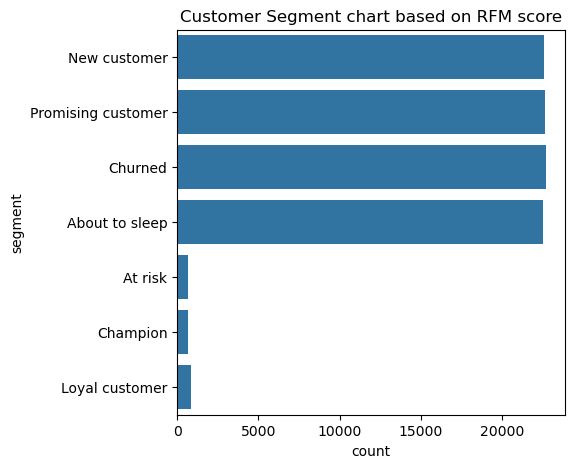

segment
Churned               22731
Promising customer    22685
New customer          22613
About to sleep        22527
Loyal customer          857
Champion                692
At risk                 673
Name: count, dtype: int64

In [18]:
#Customer segment Chart

plt.figure(figsize=(5,5))
sns.countplot(RFM, y='segment')
plt.title('Customer Segment chart based on RFM score')
plt.show()

RFM['segment'].value_counts()



From the chart we can see that most customers have churned and loyal customer and 

## K-Means Clustering with RFM 

In [19]:
#K-Means Clustering

KRFM = RFM.copy()

#Scaling our Data 
KRFM_scaled = KRFM[['Recency', 'Frequency', 'Monetary']]
KRFM_scaled = preprocessing.scale(KRFM_scaled)

#converting back to a Dataframe 
KRFM_scaled = pd.DataFrame({
    'Recency':KRFM_scaled[:,0],
    'Frequency':KRFM_scaled[:,1],
    'Monetary':KRFM_scaled [:,2]
    })


## Finding the within cluster sum of square (wcss)

In [20]:
#calculating the average distance

wcss = []

for i in range(1,12):
    kmean = KMeans(i)
    kmean.fit_predict(KRFM_scaled)
    K_iter = kmean.inertia_
    
    wcss.append(K_iter)
    wcss

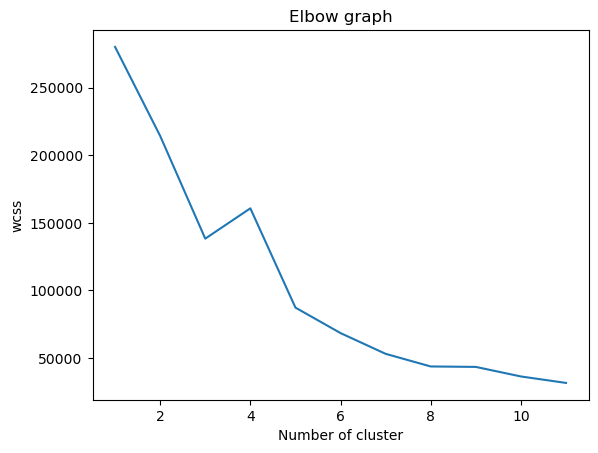

In [21]:
#Ploting Elbow graph
Range = range(1,12)
plt.plot(Range, wcss)
plt.title('Elbow graph')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

## from the chart the optimum Cluster number is either 3 and 4

## Validating optimum cluster number via silhouette Method

Text(0, 0.5, 'silhouette score')

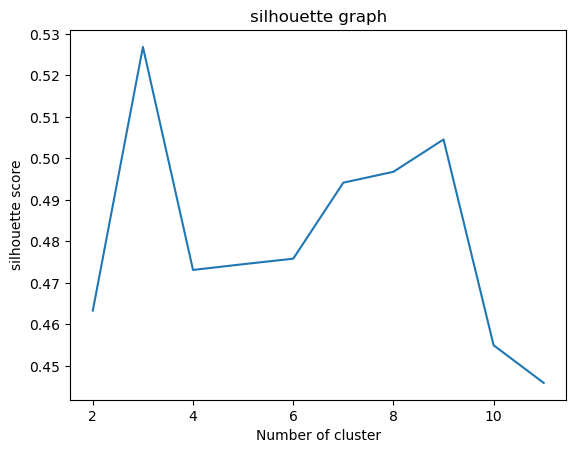

In [22]:
#Validating Clustering Number with silhouette method 

R = range(2,12)

sil_score = []

for i in R:
    km = KMeans(n_clusters=i, random_state=42)
    labels = km.fit_predict(KRFM_scaled)
    sil = silhouette_score(KRFM_scaled, labels)
    sil_score.append(sil)

plt.plot(R, sil_score)
plt.title('silhouette graph')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')



## From the above chart, the Maximum silhouette score is 3

Therefore, our optimum Cluster is 3

In [23]:
#silhouette plot shows our optimum is 3
kmean_O = KMeans(n_clusters=3, random_state=42)
label_O = kmean_O.fit_predict(KRFM_scaled)

KRFM_plt = KRFM.iloc[:,:3]

KRFM_plt['cluster'] = label_O

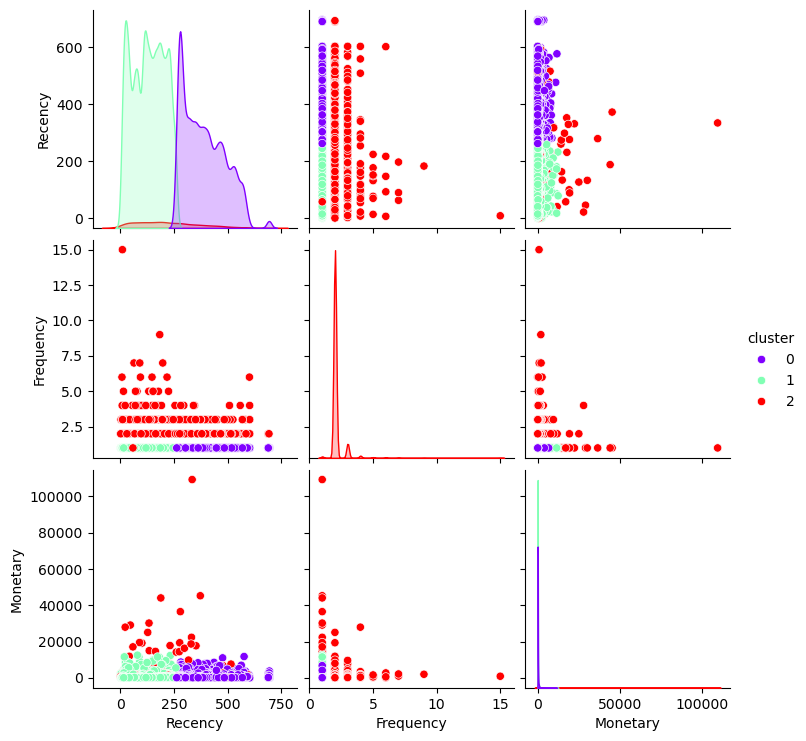

In [24]:
sns.pairplot(KRFM_plt, hue= 'cluster', palette='rainbow')
plt.show()

### Clusters Analysis: 
- Purple cluster (cluster 0): This cluster includes largely customers that are about to sleep and and churned customers, very few were frequent and are also low value customers. Hence they are ***At-Risk/Churned*** customers
- Green cluster (cluster 1):are mostly returning and new customers, happens to be the most consistent overtime but however spent little. Hence, they are our ***Loyal customers***
- Red Cluster (cluster 2): includes majority of High Value customers, many are consistent, about 50% have bought lately and the rest are about to sleep. Hence, they are  ***Champions/High Value*** customers

## Insights and Recommendations

#### Loyal customer: 
Since this is a group of consistent customers but with low monetary value, the goal is the increase their Average Order Value (AOV) and this can be achieved by upselling and cross-selling to them (by offering discount for spending more and offering bundle discount when they buy combination of items)

#### At Risk/Churned customers:
The goal is to reactivate or revive these customers and this can be achieved by 
- craeting a  time limit offers
- free shipping on their orders

#### Champios/High Value Customers:
These are the most precious and our top priority customers. Our goal is to  keep retaining the consistent ones and engage those at the risk of churning to prevent high value churn

This can be achieved by
- Offering them exclusive discount offers
- Personalized recommendations
- Place them on high priority list (VIP treatment)



 Author

👤 Lukman Akorede
>Data Analyst, Data Science & Machine Learning Enthusiast
